# WeatherPy
----

In [30]:
import pandas as pd
import json
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime

from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [3]:
# Define city list
city_list=[]

# Loop through random coordinates to generate city list
for city in range(2000):
    lat=random.randrange(-90,90)
    lng=random.randrange(-180,180)
    city = citipy.nearest_city(lat,lng)
    city_list.append(city.city_name)
# Check city list length
len(city_list)

2000

In [4]:
# Drop duplicate cities from city list
city_list = list(set(city_list))

# Check city list length with out duplicate cities
len(city_list)

760

In [5]:
# Define lists for city data
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

#data={"City":[City],"Lat":[Lat],"Lng":[Lng],"Max_Temp":[Max_Temp],"Humidity":[Humidity],"Cloudiness":[Cloudiness],"Wind_Speed":[Wind_Speed],"Country":[Country],"Date":[Date]}


In [6]:
# Set weather api url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define city to test weather api url
city="petaluma"   
    
query_url = url + "appid=" + weather_api_key + "&q=" + city
print(f"Getting data for {city}")
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

Getting data for petaluma


{'coord': {'lon': -122.64, 'lat': 38.23},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 286.35,
  'feels_like': 285.65,
  'temp_min': 285.15,
  'temp_max': 287.59,
  'pressure': 1015,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 1.5, 'deg': 330},
 'clouds': {'all': 40},
 'dt': 1601023747,
 'sys': {'type': 1,
  'id': 5152,
  'country': 'US',
  'sunrise': 1601042485,
  'sunset': 1601085753},
 'timezone': -25200,
 'id': 5382232,
 'name': 'Petaluma',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
# Define weather api url
url = "http://api.openweathermap.org/data/2.5/weather?"

# City counter 
x=1

# Store today's date 
today= datetime.date.today()
date=today.strftime("%m/%d/%Y")

# Loop through city_list to retrieve city data from weather api url
for city in city_list:    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    try:
        print(f"Getting data for city #{x}|{city}")
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        City.append(weather_json['name'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Humidity.append(weather_json['main']['humidity'])
        Cloudiness.append(weather_json['clouds']['all'])
        Wind_Speed.append(weather_json['wind']['speed'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        x=x+1
    except:
        print("data not found")

Getting data for city #1|caravelas
Getting data for city #2|tarakan
Getting data for city #3|port augusta
Getting data for city #4|saint george
Getting data for city #5|zhicheng
Getting data for city #6|hami
Getting data for city #7|thyolo
Getting data for city #8|klaksvik
Getting data for city #9|kuryk
Getting data for city #10|paraiso
Getting data for city #11|alotau
data not found
Getting data for city #11|castro
Getting data for city #12|guozhen
Getting data for city #13|chapais
Getting data for city #14|qandala
Getting data for city #15|ikwiriri
Getting data for city #16|dikson
Getting data for city #17|sterling
Getting data for city #18|hermanus
Getting data for city #19|ereymentau
Getting data for city #20|goderich
Getting data for city #21|fort-shevchenko
Getting data for city #22|tilichiki
Getting data for city #23|hobart
Getting data for city #24|jaguarari
Getting data for city #25|saint-philippe
Getting data for city #26|shache
Getting data for city #27|shangrao
Getting data

Getting data for city #209|pula
Getting data for city #210|garoua
Getting data for city #211|gamba
Getting data for city #212|vila velha
Getting data for city #213|petrivka
Getting data for city #214|shubarkuduk
Getting data for city #215|koumac
Getting data for city #216|georgetown
Getting data for city #217|grand gaube
Getting data for city #218|tautira
Getting data for city #219|khorixas
Getting data for city #220|dirba
Getting data for city #221|storforshei
Getting data for city #222|polunochnoye
Getting data for city #223|betanzos
Getting data for city #224|krasnoarmeysk
Getting data for city #225|ananas
Getting data for city #226|hovd
Getting data for city #227|kerema
Getting data for city #228|magadan
Getting data for city #229|abonnema
Getting data for city #230|takoradi
Getting data for city #231|carnarvon
Getting data for city #232|kegayli
data not found
Getting data for city #232|evensk
Getting data for city #233|rabo de peixe
Getting data for city #234|tari
Getting data for

Getting data for city #416|riyadh
Getting data for city #417|wala
Getting data for city #418|the valley
Getting data for city #419|omboue
Getting data for city #420|ituni
data not found
Getting data for city #420|carutapera
Getting data for city #421|portmore
Getting data for city #422|sao joao da barra
Getting data for city #423|rosarito
Getting data for city #424|rancho palos verdes
Getting data for city #425|upernavik
Getting data for city #426|faanui
Getting data for city #427|tazovskiy
Getting data for city #428|san jose
Getting data for city #429|ous
Getting data for city #430|corinto
Getting data for city #431|grand-santi
Getting data for city #432|utiroa
data not found
Getting data for city #432|doha
Getting data for city #433|esperance
Getting data for city #434|grand river south east
data not found
Getting data for city #434|vammala
Getting data for city #435|sistranda
Getting data for city #436|kambove
Getting data for city #437|ushtobe
Getting data for city #438|rayevskiy
G

Getting data for city #613|belushya guba
data not found
Getting data for city #613|polessk
Getting data for city #614|bethel
Getting data for city #615|changtu
Getting data for city #616|morgan city
Getting data for city #617|maumere
Getting data for city #618|tezu
Getting data for city #619|iskateley
Getting data for city #620|lephepe
data not found
Getting data for city #620|agadir
Getting data for city #621|plettenberg bay
Getting data for city #622|rehoboth
Getting data for city #623|kilrush
Getting data for city #624|tubruq
data not found
Getting data for city #624|itaituba
Getting data for city #625|pavilosta
Getting data for city #626|poya
Getting data for city #627|ximei
Getting data for city #628|bengkulu
Getting data for city #629|abalak
Getting data for city #630|gizo
Getting data for city #631|sovetskiy
Getting data for city #632|nador
Getting data for city #633|singaraja
Getting data for city #634|katete
Getting data for city #635|ust-kuyga
Getting data for city #636|nazar

In [8]:
# Create dataframe from city data
data={"City":City,"Lat":Lat,"Lng":Lng,"Max_Temp":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind_Speed":Wind_Speed,"Country":Country,"Date":Date}
data_df=pd.DataFrame(data, columns=['City','Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Country','Date'])

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Caravelas,-17.71,-39.25,71.10,86,17,2.42,BR,1601023748
1,Tarakan,3.30,117.63,84.45,69,45,9.33,ID,1601023748
2,Port Augusta,-32.50,137.77,55.40,47,87,20.80,AU,1601023748
3,Saint George,37.10,-113.58,75.20,22,1,3.36,US,1601023642
4,Zhicheng,30.30,111.50,71.01,85,100,6.11,CN,1601023749
...,...,...,...,...,...,...,...,...,...
693,Wanning,18.80,110.40,85.08,72,100,5.01,CN,1601023973
694,Kaitangata,-46.28,169.85,46.99,83,75,1.99,NZ,1601023973
695,Puerto Ayacucho,5.66,-67.62,73.06,95,100,2.64,VE,1601023973
696,Rengo,-34.42,-70.87,51.80,93,90,4.70,CL,1601023973


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Export city data into .csv file
data_df.to_csv (r'..\output_data\cities_data.csv', index = False, header=True)

# Display dataframe
data_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Caravelas,-17.71,-39.25,71.10,86,17,2.42,BR,1601023748
1,Tarakan,3.30,117.63,84.45,69,45,9.33,ID,1601023748
2,Port Augusta,-32.50,137.77,55.40,47,87,20.80,AU,1601023748
3,Saint George,37.10,-113.58,75.20,22,1,3.36,US,1601023642
4,Zhicheng,30.30,111.50,71.01,85,100,6.11,CN,1601023749
...,...,...,...,...,...,...,...,...,...
693,Wanning,18.80,110.40,85.08,72,100,5.01,CN,1601023973
694,Kaitangata,-46.28,169.85,46.99,83,75,1.99,NZ,1601023973
695,Puerto Ayacucho,5.66,-67.62,73.06,95,100,2.64,VE,1601023973
696,Rengo,-34.42,-70.87,51.80,93,90,4.70,CL,1601023973


## Inspect the data and remove the cities where the humidity > 100%.
----

In [10]:
# Drop city with humidity over 100%
data_clean=data_df.drop( data_df[ data_df['Humidity'] > 100 ].index , inplace=False)

# Display clean dataframe
data_clean

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Caravelas,-17.71,-39.25,71.10,86,17,2.42,BR,1601023748
1,Tarakan,3.30,117.63,84.45,69,45,9.33,ID,1601023748
2,Port Augusta,-32.50,137.77,55.40,47,87,20.80,AU,1601023748
3,Saint George,37.10,-113.58,75.20,22,1,3.36,US,1601023642
4,Zhicheng,30.30,111.50,71.01,85,100,6.11,CN,1601023749
...,...,...,...,...,...,...,...,...,...
693,Wanning,18.80,110.40,85.08,72,100,5.01,CN,1601023973
694,Kaitangata,-46.28,169.85,46.99,83,75,1.99,NZ,1601023973
695,Puerto Ayacucho,5.66,-67.62,73.06,95,100,2.64,VE,1601023973
696,Rengo,-34.42,-70.87,51.80,93,90,4.70,CL,1601023973


## Plot the Data


## Latitude vs. Temperature Plot

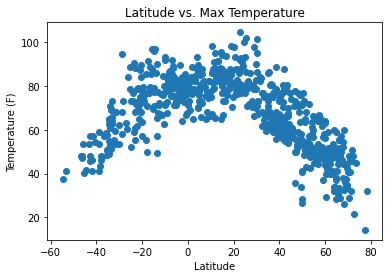

In [12]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Max_Temp"])
plt.title(f"Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
fig.savefig('lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

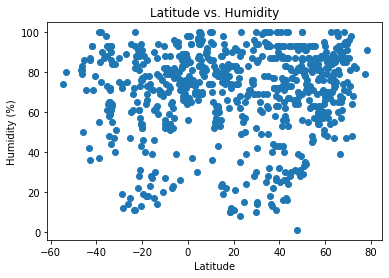

In [13]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Humidity"])
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
fig.savefig('lat_v_humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

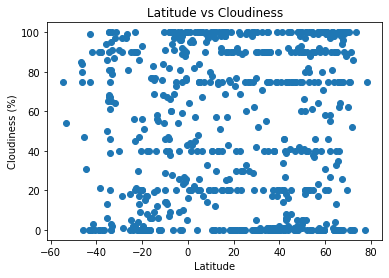

In [14]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Cloudiness"])
plt.title(f"Latitude vs Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
fig.savefig('lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

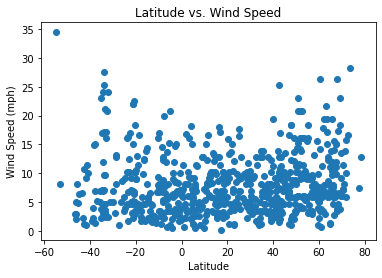

In [15]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Wind_Speed"])
plt.title(f"Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
fig.savefig('lat_v_wind.png')
plt.show()

## Linear Regression

In [16]:
# Create separate data frames for the northern and southern hemispheres
north_df=data_df.drop(data_df[data_df['Lat']<0].index,inplace=False)
south_df=data_df.drop(data_df[data_df['Lat']>0].index,inplace=False)
print(f"{len(north_df)} cities in our sample list are in the northern hemisphere")
print(f"{len(south_df)} cities in our sample list are in the southern hemisphere")

480 cities in our sample list are in the northern hemisphere
218 cities in our sample list are in the southern hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

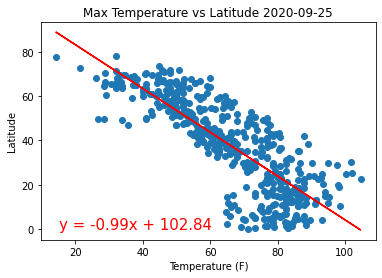

In [35]:
# Generate scatter plot
plt.scatter(north_df["Max_Temp"], north_df["Lat"])
plt.title(f"Max Temperature vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Max_Temp"], north_df["Lat"])
regress_values = north_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Max_Temp"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(15,0),fontsize=15,color="red")
fig.savefig('temp_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

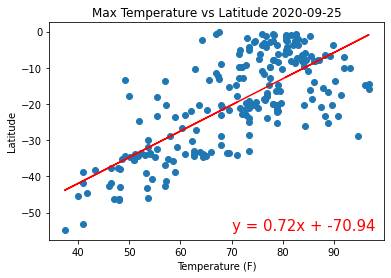

In [36]:
# Generate scatter plot
plt.scatter(south_df["Max_Temp"], south_df["Lat"])
plt.title(f"Max Temperature vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Max_Temp"], south_df["Lat"])
regress_values = south_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Max_Temp"], south_df["Lat"])

# Plot regression
plt.plot(south_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(70,-55),fontsize=15,color="red")
fig.savefig('temp_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

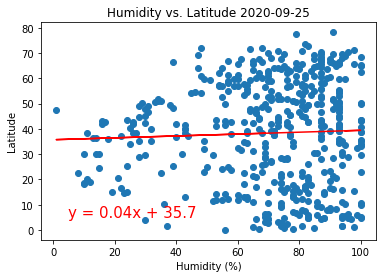

In [37]:
# Generate scatter plot
plt.scatter(north_df["Humidity"], north_df["Lat"])
plt.title(f"Humidity vs. Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Humidity"], north_df["Lat"])
regress_values = north_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Humidity"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")

fig.savefig('humdity_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

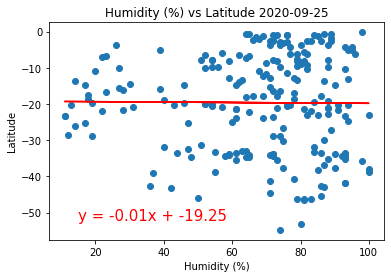

In [38]:
# Generate scatter plot
plt.scatter(south_df["Humidity"], south_df["Lat"])
plt.title(f"Humidity (%) vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Humidity"], south_df["Lat"])
regress_values = south_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Humidity"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(15, -52),fontsize=15,color="red")
fig.savefig('humdity_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

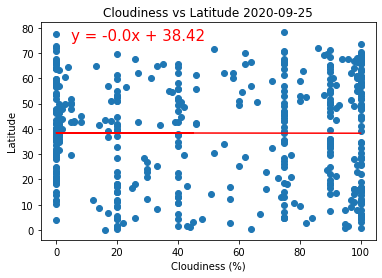

In [39]:
# Generate scatter plot
plt.scatter(north_df["Cloudiness"], north_df["Lat"])
plt.title(f"Cloudiness vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Cloudiness"], north_df["Lat"])
regress_values = north_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Cloudiness"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(5, 75),fontsize=15,color="red")
fig.savefig('cloud_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

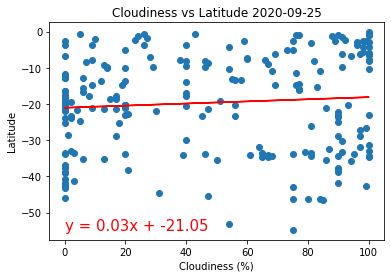

In [40]:
# Generate scatter plot
plt.scatter(south_df["Cloudiness"], south_df["Lat"])
plt.title(f"Cloudiness vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Cloudiness"], south_df["Lat"])
regress_values = south_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Cloudiness"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(0, -55),fontsize=15,color="red")
fig.savefig('cloud_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

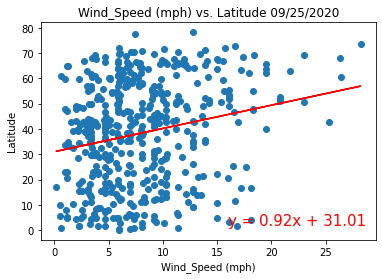

In [51]:
# Generate scatter plot
plt.scatter(north_df["Wind_Speed"], north_df["Lat"])
plt.title(f"Wind_Speed (mph) vs. Latitude {date}")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Wind_Speed"], north_df["Lat"])
regress_values = north_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(north_df["Wind_Speed"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(16,2),fontsize=15,color="red")
fig.savefig('wind_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

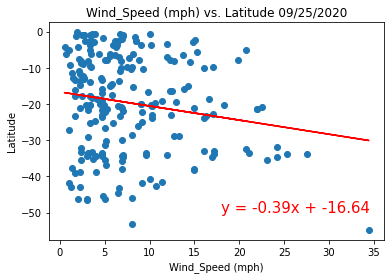

In [48]:
# Generate scatter plot
plt.scatter(south_df["Wind_Speed"], south_df["Lat"])
plt.title(f"Wind_Speed (mph) vs. Latitude {date}")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Wind_Speed"], south_df["Lat"])
regress_values = south_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(south_df["Wind_Speed"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(18, -50),fontsize=15,color="red")
fig.savefig('humdity_v_lat_south.png')
plt.show()

09/25/2020
